In [ ]:
'''
Implementing Feedforward neural networks with Keras and TensorFlow for 
classification of  hand-written MNIST dataset using below steps:  
a. Import the necessary packages 
b. Load the training and testing data  
c. Define the network architecture using Keras  
d. Train the model using SGD with 11 epochs 
e. Evaluate the network   
f. Plot the training loss and accuracy 
'''

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reproducibility 
tf.keras.utils.set_random_seed(42)
np.random.seed(42)

In [3]:
# Load training and testing data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
# Preprocess: scale to [0, 1] and flatten 28*28 -> 784
x_train = (x_train.astype("float32") / 255.0).reshape((-1, 28 * 28))
x_test = (x_test.astype("float32") / 255.0).reshape((-1, 28 * 28))

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [5]:
# MLP
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile with SGD
opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
             loss=losses.SparseCategoricalCrossentropy(),
             metrics=["accuracy"])

In [20]:
# Train for 11 epochs
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=11,
    batch_size=128,
    verbose=2
)

Epoch 1/11
422/422 - 3s - 7ms/step - accuracy: 0.8221 - loss: 0.5907 - val_accuracy: 0.9418 - val_loss: 0.2108
Epoch 2/11
422/422 - 2s - 5ms/step - accuracy: 0.9196 - loss: 0.2765 - val_accuracy: 0.9595 - val_loss: 0.1500
Epoch 3/11
422/422 - 2s - 5ms/step - accuracy: 0.9394 - loss: 0.2069 - val_accuracy: 0.9647 - val_loss: 0.1221
Epoch 4/11
422/422 - 2s - 5ms/step - accuracy: 0.9491 - loss: 0.1711 - val_accuracy: 0.9688 - val_loss: 0.1054
Epoch 5/11
422/422 - 2s - 5ms/step - accuracy: 0.9571 - loss: 0.1466 - val_accuracy: 0.9730 - val_loss: 0.0944
Epoch 6/11
422/422 - 2s - 5ms/step - accuracy: 0.9610 - loss: 0.1296 - val_accuracy: 0.9757 - val_loss: 0.0864
Epoch 7/11
422/422 - 2s - 5ms/step - accuracy: 0.9663 - loss: 0.1148 - val_accuracy: 0.9767 - val_loss: 0.0817
Epoch 8/11
422/422 - 2s - 5ms/step - accuracy: 0.9693 - loss: 0.1049 - val_accuracy: 0.9793 - val_loss: 0.0753
Epoch 9/11
422/422 - 2s - 5ms/step - accuracy: 0.9714 - loss: 0.0945 - val_accuracy: 0.9782 - val_loss: 0.0754
E

In [22]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

Test loss: 0.0719 | Test accuracy: 0.9784


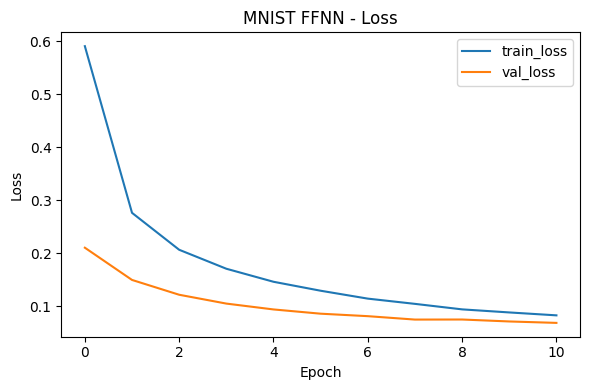

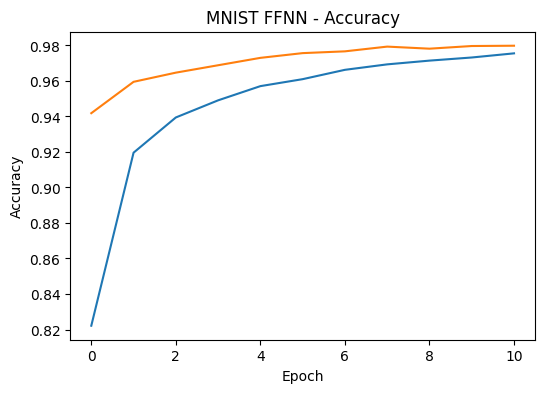

In [24]:
# Plot: training/validation loss + accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MNIST FFNN - Loss')
plt.legend()
plt.tight_layout()
plt.show

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MNIST FFNN - Accuracy')
plt.show()